In [1]:
import xarray as xr
import numpy as np
import metpy

In [2]:
ds1=xr.open_dataset('./adaptor.mars.internal-1721825370.8378592-32443-11-79729393-fafb-4b34-ae85-546b9c6773a3.nc')

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
ds2=xr.open_dataset('./adaptor.mars.internal-1721826023.7730846-24972-10-78f3e92c-574b-41ea-8df7-9a7453f5b00c.nc')

In [19]:
ds1

<xarray.Dataset>
Dimensions:    (longitude: 1, latitude: 5, expver: 2, time: 4813)
Coordinates:
  * longitude  (longitude) float32 11.3
  * latitude   (latitude) float32 23.0 22.75 22.5 22.25 22.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 2024-01-01 ... 2024-07-19T12:00:00
Data variables:
    u10        (time, expver, latitude, longitude) float32 ...
    v10        (time, expver, latitude, longitude) float32 ...
    d2m        (time, expver, latitude, longitude) float32 ...
    t2m        (time, expver, latitude, longitude) float32 ...
    blh        (time, expver, latitude, longitude) float32 ...
    sp         (time, expver, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-07-24 12:51:01 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

In the downloaded file, an extra dimenions ‘expver’ indicates which data is ERA5 (expver = 1) and which is ERA5T (expver = 5).

# merge expver

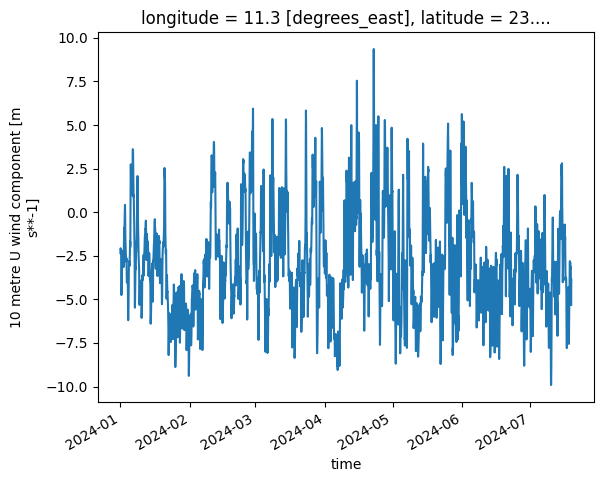

In [18]:
ds1.sel(expver=1).combine_first(
    ds1.sel(expver=5)).u10[:,0,0].plot()

# merge datasets

In [4]:
ds=xr.concat([ds2,ds1.sel(expver=1).combine_first(ds1.sel(expver=5))],dim='time')

In [5]:
ds

<xarray.Dataset>
Dimensions:    (longitude: 1, latitude: 5, time: 7021)
Coordinates:
  * longitude  (longitude) float32 11.3
  * latitude   (latitude) float32 23.0 22.75 22.5 22.25 22.0
  * time       (time) datetime64[ns] 2023-10-01 ... 2024-07-19T12:00:00
Data variables:
    u10        (time, latitude, longitude) float32 0.5762 0.3478 ... -3.992
    v10        (time, latitude, longitude) float32 -0.008012 0.6799 ... -0.599
    d2m        (time, latitude, longitude) float32 280.4 282.1 ... 275.9 276.3
    t2m        (time, latitude, longitude) float32 298.7 299.2 ... 313.7 314.4
    blh        (time, latitude, longitude) float32 37.09 37.42 ... 3.264e+03
    sp         (time, latitude, longitude) float32 9.151e+04 ... 9.432e+04
Attributes:
    Conventions:  CF-1.6
    history:      2024-07-24 13:00:51 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

# calculate RH

In [20]:
from metpy.calc import relative_humidity_from_dewpoint
from metpy.units import units
relative_humidity_from_dewpoint(25 * units.degC, 12 * units.degC).to('percent')


44.24847652208983 <Unit('percent')>

In [21]:
units.degK

<Unit('kelvin')>

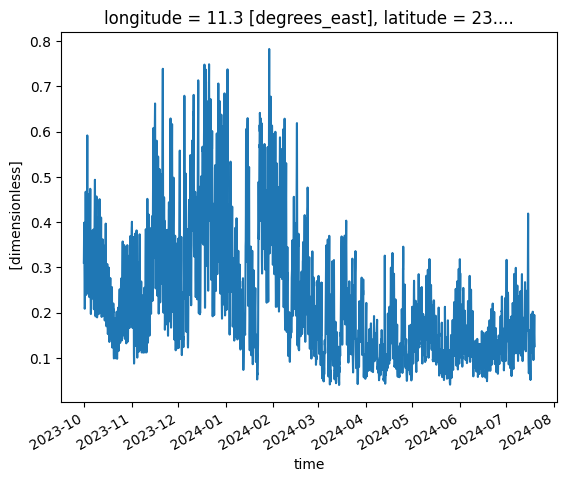

In [22]:
relative_humidity_from_dewpoint(ds.t2m*units.degK, ds.d2m*units.degK)[:,0].plot()#.to('percent')